<a href="https://colab.research.google.com/github/allisson2156/AnaliseMusicasSpotify2023/blob/main/SongsSpotify2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TAREFAS:
# PADRONIZAR TODO CÓDIGO COM A MESMA BIBLIOTECA
# PADRONIZAR COR DOS GRÁFICOS

In [34]:
# importação de bibliotecas

# Plotly
import plotly.express as px
import plotly.offline as py
from plotly.subplots import make_subplots
import plotly.colors as colors
import plotly.graph_objects as go

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [35]:
# leitura do arquivo
df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')

df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [36]:
# Mostra o número de colunas e linhas ("f" é uma string formatada do python, que permite a inclusão de expressões entre chaves {})
print(f"Número de colunas: {df.shape[1]}\nNúmero de linhas: {df.shape[0]}")

Número de colunas: 24
Número de linhas: 953


In [37]:
# manuseio do dados e informações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [38]:
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [39]:
# Converter a coluna 'streams' para numérico, forçando erros a serem NaN
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

# Remover linhas com valores NaN na coluna 'streams'
df = df.dropna(subset=['streams'])


In [40]:
# Lista das colunas categóricas que não devem ser convertidas para numérico
categorical_columns = ['track_name', 'artist(s)_name', 'key', 'mode']

# Loop através de todas as colunas do DataFrame
for coluna in df.columns:
    # Verifica se a coluna não está na lista de colunas categóricas e se não é a coluna 'streams'
    if coluna not in categorical_columns and coluna not in ['streams']:
        # Converte a coluna para numérico, coercing (forçando) valores inválidos para NaN
        df[coluna] = pd.to_numeric(df[coluna], errors='coerce')


<ipython-input-40-4ea478f1a857>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [41]:
# Cria um DataFrame booleano onde os valores NaN são marcados como True e os outros como False
nan_values = df.isna()

# Imprime o DataFrame booleano que mostra onde estão os valores NaN no DataFrame original
print(nan_values)


     track_name  artist(s)_name  artist_count  released_year  released_month  \
0         False           False         False          False           False   
1         False           False         False          False           False   
2         False           False         False          False           False   
3         False           False         False          False           False   
4         False           False         False          False           False   
..          ...             ...           ...            ...             ...   
948       False           False         False          False           False   
949       False           False         False          False           False   
950       False           False         False          False           False   
951       False           False         False          False           False   
952       False           False         False          False           False   

     released_day  in_spotify_playlists

In [42]:
# Substitui todos os valores NaN no DataFrame por 0
df.fillna(0, inplace=True)

<ipython-input-42-50dc163b0c9d>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [43]:
# Conta o número de linhas duplicadas no DataFrame e retorna a soma
df.duplicated().sum()

0

# **Inicio da Análise**

In [44]:
 # Contabiliza o número de artistas
print(f"number of artists '{df['artist(s)_name'].nunique()}'")

number of artists '644'


In [45]:
# Conta a frequência de cada valor na coluna 'artist(s)_name' e expõe os valores de cada artista
artist_counts = df['artist(s)_name'].value_counts()
artist_counts

artist(s)_name
Taylor Swift          34
The Weeknd            22
Bad Bunny             19
SZA                   19
Harry Styles          17
                      ..
Coolio, L.V.           1
Kordhell               1
Kenia OS               1
Feid, Mora             1
Feid, Sech, Jhayco     1
Name: count, Length: 644, dtype: int64

# Transformar em Plotly
# Usar "Dark Background"

In [46]:
# Cria o boxplot
fig = px.box(
    df,
    x='mode',
    y='acousticness_%',
    color_discrete_sequence=px.colors.qualitative.Dark2,
    title='Distribuição da Acústica por Tipo de Escala'
)

# Substitui os valores 0 e 1 por 'Maior' e 'Menor' no eixo x
fig.update_xaxes(ticktext=['Maior', 'Menor'], tickvals=[0, 1])

# Personaliza o layout
fig.update_layout(
    xaxis_title='Tipo de Escala',
    yaxis_title='Acústica (%)',
    plot_bgcolor='black',   # Cor de fundo da área de plotagem
    paper_bgcolor='black',  # Cor de fundo do papel
    font={"color": 'white'},  # Cor da fonte
    xaxis_title_font=dict(size=12),  # Tamanho da fonte do título do eixo x
    yaxis_title_font=dict(size=12),  # Tamanho da fonte do título do eixo y
    title_font=dict(size=14),  # Tamanho da fonte do título
    width=650,  # Largura do gráfico (ajuste conforme necessário)
    height=500  # Altura do gráfico (ajuste conforme necessário)
)

fig.show()

In [47]:
# Cria o boxplot
fig = px.box(
    df,
    x='key',
    y='acousticness_%',
    color_discrete_sequence=px.colors.qualitative.Dark2,
    title='Distribuição da Acústica para Cada Nota Musical'
)

# Personaliza o layout
fig.update_layout(
    xaxis_title='Nota Musical',
    yaxis_title='Acústica (%)',
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=True),
    plot_bgcolor='black',
    paper_bgcolor='black',
    font={"color": 'white'},
    xaxis_title_font=dict(size=12),
    yaxis_title_font=dict(size=12),
    title_font=dict(size=14)
)

fig.show()

In [48]:
# Converte os valores de "streams" para númericos
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

# Acha as top 10 músicas com mais streams
top_10_songs = df.nlargest(10, 'streams')[['track_name', 'artist(s)_name', 'streams']]
top_10_songs['number'] = range(1, len(top_10_songs)+ 1)

print(top_10_songs)

                                        track_name  \
55                                 Blinding Lights   
179                                   Shape of You   
86                               Someone You Loved   
620                                   Dance Monkey   
41   Sunflower - Spider-Man: Into the Spider-Verse   
162                                      One Dance   
84                       STAY (with Justin Bieber)   
140                                       Believer   
725                                         Closer   
48                                         Starboy   

                   artist(s)_name       streams  number  
55                     The Weeknd  3.703895e+09       1  
179                    Ed Sheeran  3.562544e+09       2  
86                  Lewis Capaldi  2.887242e+09       3  
620                   Tones and I  2.864792e+09       4  
41          Post Malone, Swae Lee  2.808097e+09       5  
162           Drake, WizKid, Kyla  2.713922e+09       6  

# ALTERAR VALORES DO EIXO Y PARA NÚMEROS REAIS
# ALTERAR O NOME DAS MÚSICAS NOS NÚMEROS
# PADRONIZAR ESSAS CORES COM OS OUTROS GRÁFICOS
# FAZER LEGENDA SEMELHANTE AO PRÓXIMO GRÁFICO
# TRANSFORMAR GRÁFICO EM PLOTLY

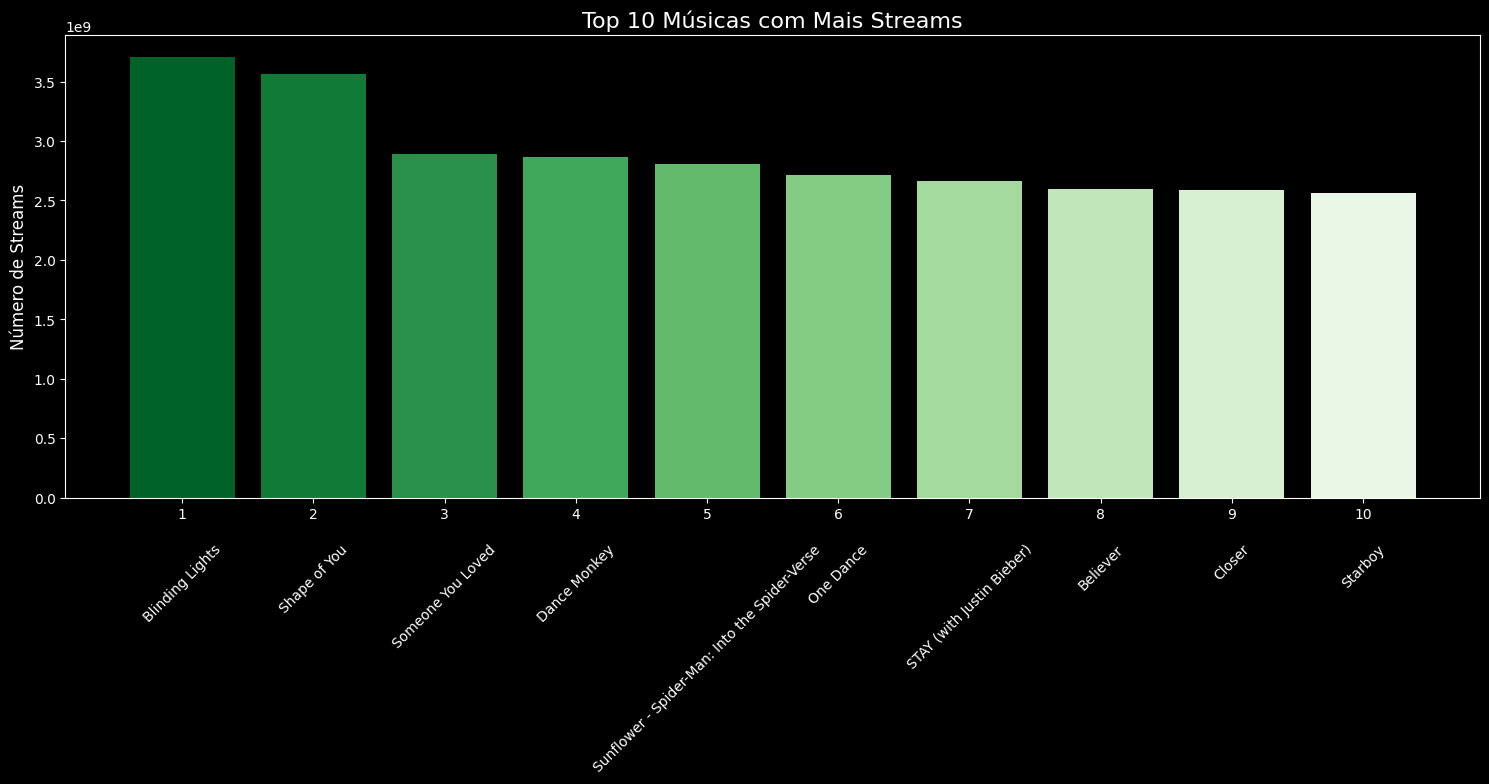

In [132]:
# Criar uma paleta de cores com diferentes tons de verde
green_palette = sns.color_palette("Greens_r", n_colors=10)

# Criar o gráfico
plt.figure(figsize=(15, 8))
bars = plt.bar(top_10_songs['number'], top_10_songs['streams'], color=green_palette)

# Configurar o eixo x para mostrar os números
plt.xticks(top_10_songs['number'])

# Adicionar título e rótulos
plt.title('Top 10 Músicas com Mais Streams', fontsize=16)
plt.ylabel('Número de Streams', fontsize=12)

# Adicionar os nomes das músicas abaixo de cada barra
# Paramos aqui
for i, bar in enumerate(bars):
  plt.text(bar.get_x()+bar.get_width()/2, -0.1*max(top_10_songs['streams']),
         top_10_songs['track_name'].iloc[i],ha='center', va='top', rotation=45, fontsize=10)

# Define a paleta de cores para o gráfico
sns.set_palette("Dark2")

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Aumentar o espaço na parte inferior para acomodar os nomes das músicas
plt.subplots_adjust(bottom=0.3)

# Exibir o gráfico
plt.tight_layout()
plt.show()

In [133]:
# Ordenar os dados em ordem decrescente e pegar os 10 artistas com mais streams
top_artists = artist_streams.sort_values(by='streams', ascending=False).head(10)

# Criar um gráfico de barras para os 10 artistas com mais streams
fig = px.bar(top_artists,
             x='streams',
             y='artist(s)_name',
             orientation='h',
             title='Top 10 Artistas com Mais Streams',
             labels={'streams': 'Número de Streams', 'artist(s)_name': 'Artista'},
             color_discrete_sequence=['#00441B'])

# Adicionar os valores dos streams sobre as barras
fig.update_traces(texttemplate='%{x}', textposition='outside')

# Personalizar o layout para um fundo preto e texto branco
fig.update_layout(
    plot_bgcolor='black',   # Cor de fundo da área de plotagem
    paper_bgcolor='black',  # Cor de fundo do papel
    font={"color": 'white'},  # Cor da fonte para garantir que o texto seja legível
    xaxis=dict(title='Número de Streams', showgrid=True, gridcolor='gray'),
    yaxis=dict(title='Artista', showgrid=True, gridcolor='gray'),
    title=dict(text='Top 10 Artistas com Mais Streams', x=0.5, font=dict(size=20)),
    template='plotly_dark'
)

# Mostrar o gráfico
fig.show()


NameError: name 'artist_streams' is not defined

# Tirar (artists name) do eixo x
# Melhorar comentários do código
# Mudar as cores do gráfico

In [50]:
fig = (px.bar(artist_counts[:15],
             text_auto = True,
             color = artist_counts[:15].index,
             color_discrete_sequence=px.colors.sequential.Greens,
             labels=dict(index="Principais nomes",value="Contagem"),
             title = 'Top 15 artistas com mais entradas na lista'
            ))

# Atualizar o layout do gráfico para adicionar fundo preto
fig.update_layout(
plot_bgcolor='black',   # Cor de fundo da área de plotagem
    paper_bgcolor='black',  # Cor de fundo do papel
    font={"color": 'white'},  # Cor da fonte para garantir que o texto seja legível
    legend={"bgcolor": 'black', "font": {"color": 'white'}}  # Cor de fundo e da fonte da legenda
)


# Exibir o gráfico
py.iplot(fig)

In [59]:
# Conta o número de músicas para cada artista
artist_counts = df['artist(s)_name'].value_counts()

# Seleciona os 15 artistas com mais músicas
top_artists = artist_counts.head(15).reset_index()

# Renomeia as colunas para 'artist' e 'count'
top_artists.columns = ['artist', 'count']

# Criar um gráfico de barras para os 15 artistas com mais músicas
fig = px.bar(
    top_artists,
    x='count',
    y='artist',
    orientation='h',
    title='Top 15 Artistas com Mais Músicas',
    labels={'count': 'Número de Músicas', 'artist': 'Artista'},
    color_discrete_sequence=['#5ce82e']  # Cor verde
)

# Personalizar o layout para um fundo preto e texto branco
fig.update_layout(
    plot_bgcolor='black',   # Cor de fundo da área de plotagem
    paper_bgcolor='black',  # Cor de fundo do papel
    font={"color": 'white'},  # Cor da fonte para garantir que o texto seja legível
    xaxis=dict(title='Número de Músicas', showgrid=True, gridcolor='white'),  # Cor da grade do eixo X
    yaxis=dict(title='', showgrid=True, gridcolor='white'),  # Cor da grade do eixo Y
    title=dict(text='Top 15 Artistas com Mais Músicas', x=0.5, font=dict(size=20)),
    template='plotly_dark'
)

# Adicionar os valores dos contagens sobre as barras
fig.update_traces(texttemplate='%{x}', textposition='outside')

# Mostrar o gráfico
fig.show()

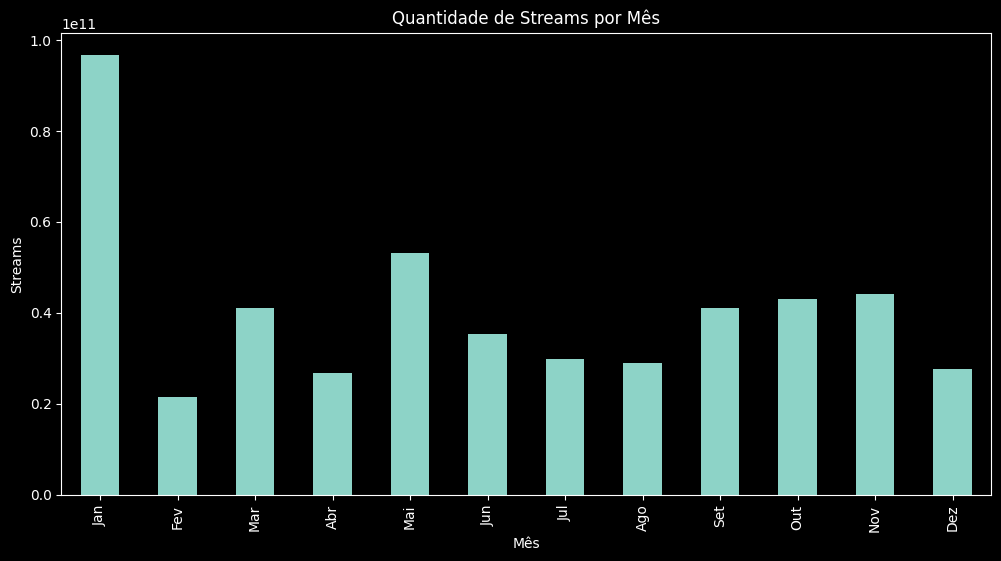

In [104]:
# Convertendo a coluna 'streams' para numérico, ignorando erros para valores não numéricos
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

# Agrupando os dados por 'released_month' e somando os streams
streams_mensais = df.groupby('released_month')['streams'].sum()

# Plotando os dados
plt.figure(figsize=(12, 6))
streams_mensais.plot(kind='bar')
plt.title('Quantidade de Streams por Mês')
plt.xlabel('Mês')
plt.ylabel('Streams')
plt.xticks(range(12), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.show()

In [58]:
# Contar o número de músicas lançadas por ano
songs_by_year = df['released_year'].value_counts().reset_index()
songs_by_year.columns = ['released_year', 'count']

# Criar um gráfico de barras para o número de músicas lançadas por ano
fig = px.bar(
    songs_by_year.head(14),  # Selecionar os 14 anos com mais lançamentos
    x='released_year',
    y='count',
    title='Número de Músicas Lançadas por Ano',
    labels={'released_year': 'Ano de Lançamento', 'count': 'Número de Músicas'},
    color_discrete_sequence=['#5ce82e']  # Cor verde
)

# Personalizar o layout para um fundo preto e texto branco
fig.update_layout(
    plot_bgcolor='black',   # Cor de fundo da área de plotagem
    paper_bgcolor='black',  # Cor de fundo do papel
    font={"color": 'white'},  # Cor da fonte para garantir que o texto seja legível
    xaxis=dict(title='Ano de Lançamento', showgrid=True, gridcolor='white'),  # Cor da grade do eixo X
    yaxis=dict(title='Número de Músicas', showgrid=True, gridcolor='white'),  # Cor da grade do eixo Y
    title=dict(text='Número de Músicas Lançadas por Ano', x=0.5, font=dict(size=20)),
    template='plotly_dark'
)

# Mostrar o gráfico
fig.show()

In [105]:
df['key'] = pd.Categorical(df['key']).codes
df['mode'] = pd.Categorical(df['mode']).codes

fig_3d_scatter = px.scatter_3d(df, x='energy_%', y='valence_%', z='danceability_%', color='streams',
                               size='streams', hover_name='track_name',
                               color_continuous_scale='YlGn',
                               template='plotly_dark',
                               title='Energy, Valência e Dançabilidade')
fig_3d_scatter.show()

In [106]:
# Cria o gráfico de dispersão com Plotly Express
fig = px.scatter(df, x='acousticness_%', y='energy_%',
                title='Valores entre a energia e porcentagem acústica de cada música',
                template='plotly_dark')  # Define o fundo escuro

# Personaliza a aparência dos pontos
fig.update_traces(marker=dict(color='green', size=8, opacity=0.5, line=dict(width=1, color='white')))

# Adiciona o grid
fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)

# Mostra o gráfico
fig.show()

In [113]:

# Define as colunas a serem plotadas
columns_to_plot = ['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

# Cria a figura com subplots, ajustando o número de linhas
fig = make_subplots(rows=3, cols=3, subplot_titles=columns_to_plot[:8])

for i, column in enumerate(columns_to_plot[:8], 1):  # Plota apenas 8 gráficos
    hist = px.histogram(df, x=column, nbins=20, color_discrete_sequence=px.colors.qualitative.Dark2)
    hist.update_layout(
        xaxis_title=column,
        title=column,
        xaxis=dict(showgrid=True),
        yaxis=dict(showgrid=True)  # Define o fundo do gráfico como transparente
    )

    row = (i - 1) // 3 + 1  # Calcula a linha correta
    col = (i - 1) % 3 + 1   # Calcula a coluna correta
    for trace in hist.data:
        fig.add_trace(trace, row=row, col=col)

# Update the overall figure layout
fig.update_layout(
    height=800,
    width=1200,
    title_text="Distribuição das características das músicas",
    showlegend=False,
    template='plotly_dark',
    plot_bgcolor='black',   # Cor de fundo da área de plotagem
    paper_bgcolor='black',  # Cor de fundo do papel
    font={"color": 'white'},  # Cor da fonte para garantir que o texto seja legível
)

# Remove o subplot vazio (9º)
fig.update_layout(annotations=[
    annotation for annotation in fig.layout.annotations if annotation['text'] != ''
])

# Show the figure
fig.show()

In [114]:
columns_to_plot = ['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

fig = make_subplots(rows=3, cols=3, subplot_titles=[f'Streams vs. {col}' for col in columns_to_plot])

for i, column in enumerate(columns_to_plot, 1):
    bar = px.bar(df, x=column, y='streams', color_discrete_sequence=px.colors.qualitative.Dark2)

    bar.update_layout(
        xaxis_title=column,
        yaxis_title='Streams',
        xaxis=dict(showgrid=True),
        yaxis=dict(showgrid=True),
        plot_bgcolor='black',
        font=dict(color='white'),
        xaxis_title_font=dict(size=12),
        yaxis_title_font=dict(size=12),
        title_font=dict(size=14)
    )

    row = (i - 1) // 3 + 1  # Calcula a linha correta
    col = (i - 1) % 3 + 1   # Calcula a coluna correta
    for trace in bar.data:
        fig.add_trace(trace, row=row, col=col)

# Personaliza o layout geral da figura
fig.update_layout(
    height=800,
    width=1200,
    showlegend=False,
    template='plotly_dark',
    paper_bgcolor='black',
    plot_bgcolor='black'
)

fig.show()


In [115]:
# Cria o Sunburst Chart
fig_sunburst = px.sunburst(
    df,
    path=['in_spotify_playlists', 'in_spotify_charts'],
    values='streams',
    color='streams',  # Define a cor com base nos streams
    color_continuous_scale='Viridis',  # Aplica a paleta Viridis
    title='Spotify Playlist and Chart Distribution'
)

# Personaliza o layout
fig_sunburst.update_layout(
    paper_bgcolor='black',  # Fundo preto para a figura
    font=dict(color='white'),  # Texto branco para contraste
    title_font=dict(size=16)  # Define o tamanho da fonte do título
)

fig_sunburst.show()

In [116]:
# Cria o Parallel Coordinates Plot
fig_parallel = px.parallel_coordinates(
    df,
    dimensions=['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%'],
    color='in_spotify_charts',
    color_continuous_scale='Viridis',  # Aplica a paleta Viridis
    title='Audio Features Comparison'
)

# Personaliza o layout
fig_parallel.update_layout(
    paper_bgcolor='black',  # Fundo preto para a figura
    font=dict(color='white'),  # Texto branco para contraste
    title_font=dict(size=16)  # Define o tamanho da fonte do título
)

# Exibe o gráfico
fig_parallel.show()